# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

#sns.set()

# Load dataset

In [2]:
df_train = pd.read_csv(r".\Data\train.csv", index_col='PassengerId')
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df_test = pd.read_csv(r".\Data\test.csv", index_col='PassengerId')
df_test.head(4)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


## Shape of dataset

In [4]:
train_shape = df_train.shape
test_shape = df_test.shape

# DataFrame containg numbers of columns and rows for train and test dataframes.
shapes = pd.DataFrame(data=[train_shape, test_shape], columns=['df_train', 'df_test'], index=['cols', 'rows'])
shapes

,df_train,df_test
cols,891,11
rows,418,10


# Basic information

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


# Visualisation

### Survived column

In [9]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
df_train.groupby(by='Survived').mean(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


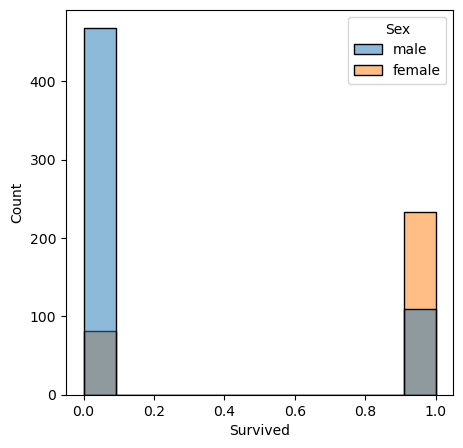

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
fig1 = sns.histplot(df_train, x='Survived', hue='Sex', ax=ax)


plt.show()

<Axes: ylabel='count'>

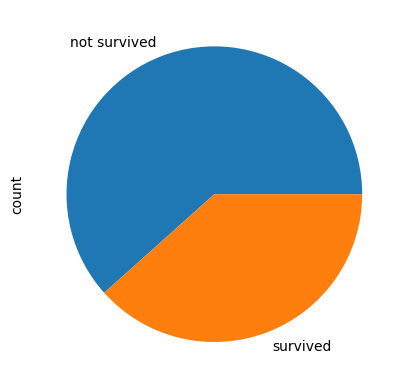

In [12]:
df_train['Survived'].value_counts().plot(kind='pie', labels=['not survived', 'survived'])

### Pclass column

<Axes: xlabel='Pclass', ylabel='Count'>

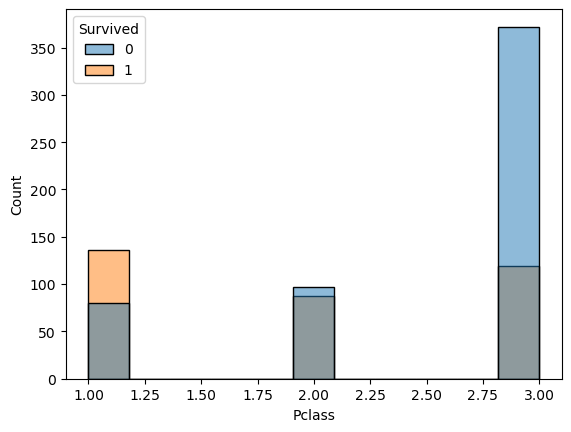

In [13]:
sns.histplot(df_train, x='Pclass', hue='Survived')

### Age column

<Axes: xlabel='Age', ylabel='Count'>

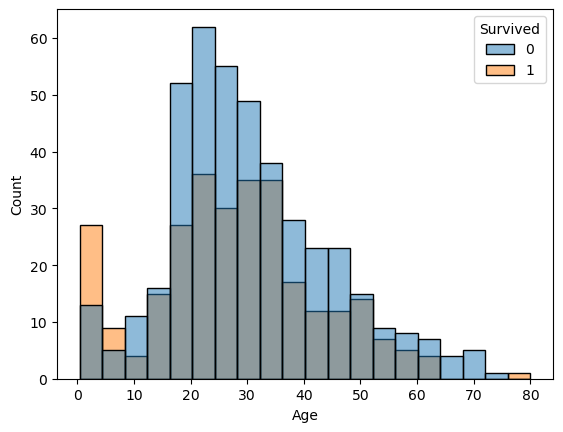

In [14]:
sns.histplot(df_train, x='Age', hue='Survived')

### Embarked column

<Axes: xlabel='Embarked', ylabel='Count'>

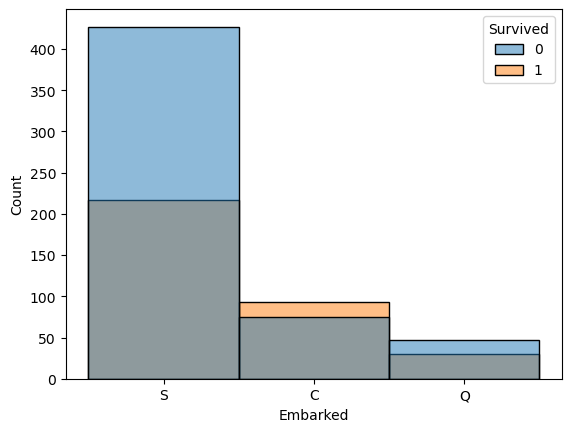

In [15]:
sns.histplot(df_train, x='Embarked', hue='Survived')

# Handling misssing values

In [16]:
# Missing vals dataframe contains information about sumber of missing values in train and test dataframes.

missing_train = df_train.isnull().sum().to_frame()
missing_test =  df_test.isnull().sum().to_frame()
missing_vals = pd.concat((missing_train, missing_test), axis=1).fillna(0).astype('int')
missing_vals.columns = ['train', 'test']
missing_vals

,train,test
Survived,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,177,86
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,1
Cabin,687,327


<Axes: ylabel='PassengerId'>

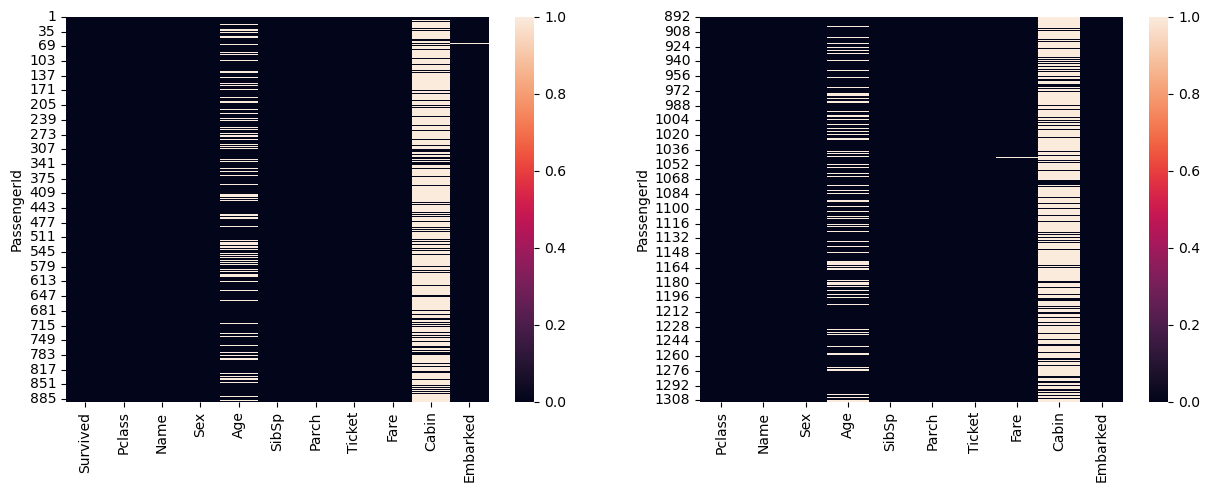

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(df_train.isna(), ax=ax[0])
sns.heatmap(df_test.isna(), ax=ax[1])

In [18]:
# Fill nan value in Embarked column by "U" (Unknown) in df_train dataframe
df_train['Embarked'].fillna('U', inplace=True)

# Mean value of age in df_train dataframe
mean_age = df_train['Age'].mean()

# Fill missing values in age column in both dataframes by mean_age
df_train["Age"].fillna(mean_age, inplace=True)
df_test['Age'].fillna(mean_age, inplace=True)

# Mean value of fare in group of a pclass in which a missing value is in test datafrate (on the basis of train data_frame)
mean_fare = df_train.groupby(by='Pclass')['Fare'].mean()[df_test[df_test['Fare'].isna()]['Pclass']]

df_test['Fare'].fillna(mean_fare.iloc[0], inplace=True)


In [19]:
# Check if everything is ok. We are leaving Cabin column with missing values because we will drop this column later.

missing_train = df_train.isnull().sum().to_frame()
missing_test =  df_test.isnull().sum().to_frame()
missing_vals = pd.concat((missing_train, missing_test), axis=1).fillna(0).astype('int')
missing_vals.columns = ['train', 'test']
missing_vals

,train,test
Survived,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,0
Cabin,687,327


# Prepare data

## sex and embarked column OneHotEncoding

In [20]:
# Sex column encoder
sex_encoder = OneHotEncoder()
# Embarked column encoder
emb_encoder = OneHotEncoder()

# fitting and transformation of sex column in df_train dataframe
sex_encoded_train = sex_encoder.fit_transform(df_train[['Sex']]).toarray()
df_train[sex_encoder.categories_[0]] = pd.DataFrame(data = sex_encoded_train, index = df_train.index)

# transformation of sex column in df_test dataframe
sex_encoded_test = sex_encoder.transform(df_test[['Sex']]).toarray()
df_test[sex_encoder.categories_[0]] = pd.DataFrame(data = sex_encoded_test, index = df_test.index)


In [21]:
# Fitting and transformation of embarked column in df_train dataframe
emb_encoded_train = emb_encoder.fit_transform(df_train[['Embarked']]).toarray()
df_train[emb_encoder.categories_[0]] = pd.DataFrame(data = emb_encoded_train, index = df_train.index)

# Transformation of embarked column in df_test dataframe

emb_encoded_test = emb_encoder.transform(df_test[['Embarked']]).toarray()
df_test[emb_encoder.categories_[0]] = pd.DataFrame(data=emb_encoded_test, index = df_test.index)

## Drop unnecessary columns: sex, ticket, cabin, embarked

In [22]:
df_train.drop(columns={'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'}, inplace=True)
df_test.drop(columns={'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'}, inplace=True)

In [23]:
df_train.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,U
PassengerId,,,,,,,,,,,,
469,0,3,29.699118,0,0,7.7250,0.0,1.0,0.0,1.0,0.0,0.0
479,0,3,22.000000,0,0,7.5208,0.0,1.0,0.0,0.0,1.0,0.0
411,0,3,29.699118,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0
100,0,2,34.000000,1,0,26.0000,0.0,1.0,0.0,0.0,1.0,0.0
625,0,3,21.000000,0,0,16.1000,0.0,1.0,0.0,0.0,1.0,0.0
20,1,3,29.699118,0,0,7.2250,1.0,0.0,1.0,0.0,0.0,0.0
350,0,3,42.000000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0
552,0,2,27.000000,0,0,26.0000,0.0,1.0,0.0,0.0,1.0,0.0
364,0,3,35.000000,0,0,7.0500,0.0,1.0,0.0,0.0,1.0,0.0


## Scaling

In [24]:
X_train = df_train.drop(columns='Survived').to_numpy()
y_train = df_train['Survived'].to_numpy()
X_test =  df_test.to_numpy()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 11)
(891,)
(418, 11)


In [25]:
scaler = StandardScaler()

# Fit and transoform X_train
X_train = scaler.fit_transform(X_train)

# Trainsform x_test
X_test = scaler.transform(X_test)

X_train

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.30756234,
         0.61930636, -0.0474312 ],
       [-1.56610693,  0.63878901,  0.43279337, ..., -0.30756234,
        -1.61470971, -0.0474312 ],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.30756234,
         0.61930636, -0.0474312 ],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.30756234,
         0.61930636, -0.0474312 ],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.30756234,
        -1.61470971, -0.0474312 ],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  3.25137334,
        -1.61470971, -0.0474312 ]])

# Models

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

accuracies = pd.DataFrame(columns = ['accuracy'])

### Logistic regression

In [27]:
lg = LogisticRegression()

y_pred = cross_val_predict(lg, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['LogisticReggresion'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.786
[[463  86]
 [105 237]]


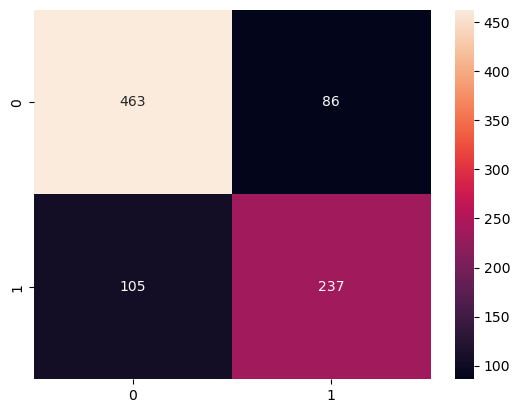

In [28]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

### SVM

In [29]:
svm = SVC()

y_pred = cross_val_predict(svm, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['SVM'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.825
[[506  43]
 [113 229]]


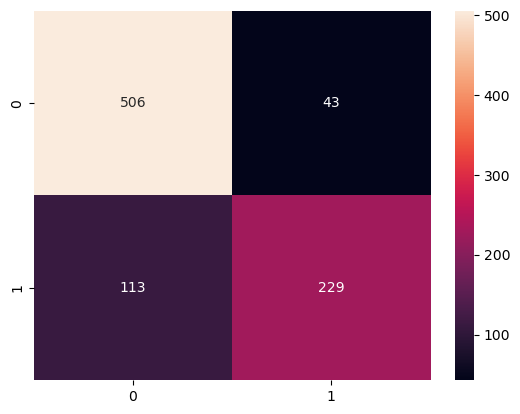

In [30]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

### Decision tree

In [31]:
tree = DecisionTreeClassifier()

y_pred = cross_val_predict(tree, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['Decision tree'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.768
[[448 101]
 [106 236]]


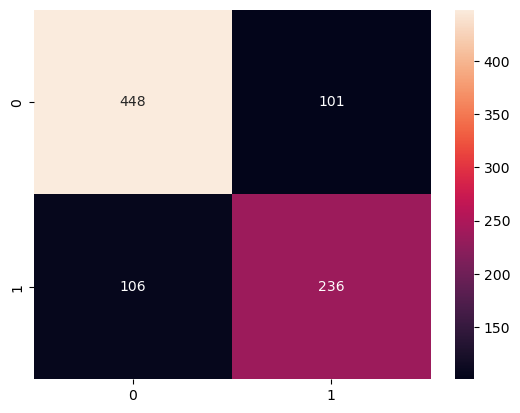

In [32]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

### Gaussian Naive Bayes

In [33]:
gnb = GaussianNB()

y_pred = cross_val_predict(gnb, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['GNB'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.636
[[541   8]
 [316  26]]


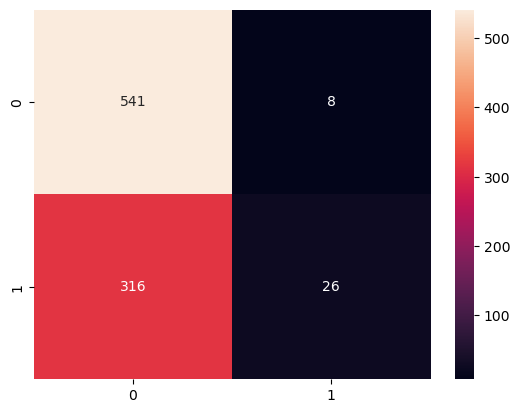

In [34]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

In [35]:
accuracies

,accuracy
LogisticReggresion,0.785634
SVM,0.824916
Decision tree,0.767677
GNB,0.636364


### Gradient boosting classifier

In [36]:
gbc = GradientBoostingClassifier()

y_pred = cross_val_predict(gbc, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['GBC'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.826
[[491  58]
 [ 97 245]]


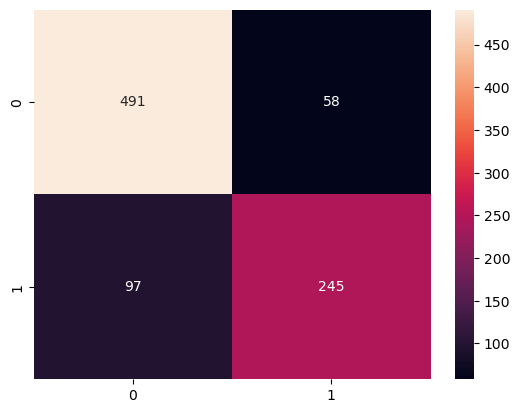

In [37]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

### Random Forest Clasifier

In [38]:
rfc = RandomForestClassifier()

y_pred = cross_val_predict(rfc, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['rfc'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.811
[[472  77]
 [ 91 251]]


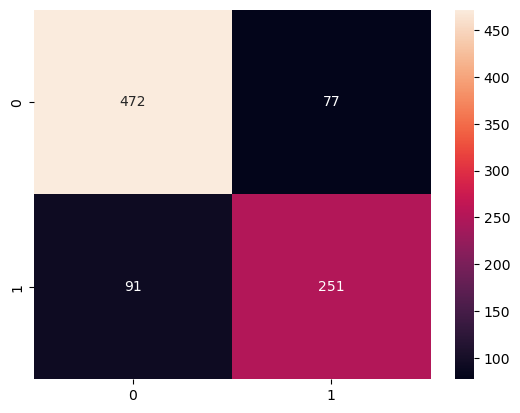

In [39]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

### Perceptron

In [40]:
perc = RandomForestClassifier()

y_pred = cross_val_predict(perc, X_train, y_train)

acc = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)

accuracies.loc['perceptron'] = acc

print(f"Accuracy score: {round(acc,3)}")
print(conf_mat)

Accuracy score: 0.805
[[470  79]
 [ 95 247]]


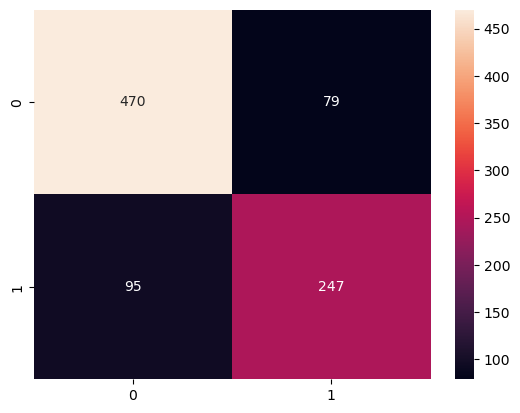

In [41]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.show()

### accuracies

In [42]:
accuracies.sort_values(by='accuracy', ascending=False)

,accuracy
GBC,0.826038
SVM,0.824916
rfc,0.811448
perceptron,0.804714
LogisticReggresion,0.785634
Decision tree,0.767677
GNB,0.636364


# Submission

In [43]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

y_test = pd.DataFrame(data = y_pred, columns=['accuracy'], index=df_test.index)
y_test

,accuracy
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
